In [1]:
# general
import sys, os, path
import datetime

# nn related
import torch
import torch as th
import torch.nn as nn
import numpy as np
from numpy import linalg as la

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl
from matplotlib.transforms import Bbox

import sys, re, os, path
from matplotlib import axis
import seaborn as sns
colors=sns.color_palette()

# own scrips
sys.path.insert(1, '/home/leonriccius/PycharmProjects/data_driven_rans')
from scripts.preProcess import readPatchData
from scripts.preProcess import readCellCenters
from scripts.preProcess import readVectorData
from scripts.utilities import *

from scripts import preProcess as pre

In [2]:
def mse_b_unique(a, b):
    return nn.MSELoss()(a[:, [0, 1, 2, 4, 5, 8]], b[:, [0, 1, 2, 4, 5, 8]])

In [3]:
# define model paths
model_base = '/home/leonriccius/PycharmProjects/data_driven_rans/storage/models/kaandorp_data/ph_cdc_sd/additional_features/phill_2800_10595_cdc_12600_sd_2000_2400_2900_3200_reg_1e-10_lr_10e-07_lr_scheduler_seed_12344/'

# read in mu, std, model
mu = th.load(os.sep.join([model_base, 'mu.th']))
std = th.load(os.sep.join([model_base, 'std.th']))
train_loss = th.load(os.sep.join([model_base, 'loss_vector.th']))
val_loss = th.load(os.sep.join([model_base, 'val_loss_vector.th']))

model = th.load(os.sep.join([model_base, 'model.pt']))
_ = model.eval()

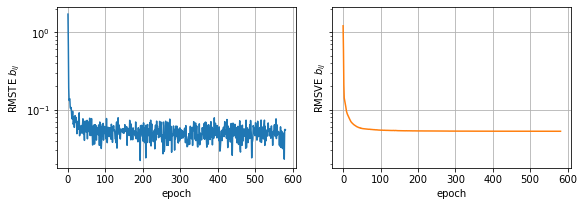

In [4]:
# create figure
nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (4*ncols, 2.75*nrows), constrained_layout=True, sharey=True)

# ax.loglog(lambdas, rmse_sep, marker='o', markersize=5)
ax[0].semilogy(np.arange(0,train_loss.shape[0]), np.sqrt(train_loss), linewidth=1.5)
ax[1].semilogy(np.arange(0,val_loss.shape[0]), np.sqrt(val_loss), linewidth=1.5, color=sns.color_palette()[1])

# set grid
ax[0].grid(which='major')
ax[1].grid(which='major')
# ax.grid(which='minor', linestyle='--', linewidth=0.4)

# set labels
ax[0].set_xlabel(r'epoch')
ax[1].set_xlabel(r'epoch')
ax[0].set_ylabel(r'RMSTE $b_{ij}$')
ax[1].set_ylabel(r'RMSVE $b_{ij}$')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/numerical_results/network_parameters/'
fig_name = os.sep.join([fig_path, 'training_validation_error.pdf'])
# plt.savefig(fig_name, format='pdf')